In [7]:
from finquant.portfolio import build_portfolio
from finquant.moving_average import compute_ma, ema

names = ['NVDA', 'NVTS','KLAC','SNPS','CDNS','ORCL','NFLX']
#names = ['KLAC','SNPS','CDNS','ORCL']
start_date = '2022-06-01'
end_date = '2024-01-16'
pf = build_portfolio(names=names,
                    start_date=start_date,
                    end_date=end_date,data_api="yfinance")

[*********************100%%**********************]  7 of 7 completed


In [8]:
pf.data.head(3)

,NVDA,NVTS,KLAC,SNPS,CDNS,ORCL,NFLX
Date,,,,,,,
2022-06-01,182.978836,7.73,350.278534,316.859985,153.220001,69.585793,192.910004
2022-06-02,195.683487,8.25,364.780670,330.809998,161.410004,71.082481,205.089996
2022-06-03,186.973999,8.12,355.626068,327.679993,158.559998,69.770454,198.979996


In [9]:
pf.properties()

----------------------------------------------------------------------
Stocks: NVDA, NVTS, KLAC, SNPS, CDNS, ORCL, NFLX
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.447
Portfolio Volatility: 0.340
Portfolio Downside Risk: 0.263
Portfolio Value at Risk: 1.007
Confidence level of Value at Risk: 95.00 %
Portfolio Sharpe Ratio: 1.299
Portfolio Sortino Ratio: 1.682

Skewness:
      NVDA      NVTS      KLAC      SNPS     CDNS      ORCL      NFLX
0  0.26779  0.490739  0.362365  0.497341  0.17957  0.054751 -0.099083

Kurtosis:
       NVDA      NVTS      KLAC      SNPS      CDNS      ORCL     NFLX
0 -1.589058 -0.596822 -0.676109 -0.777922 -1.182512 -1.311915 -1.07083

Information:
  Allocation  Name
0   0.142857  NVDA
1   0.142857  NVTS
2   0.142857  KLAC
3   0.142857  SNPS
4   0.142857  CDNS
5   0.142857  ORCL
6   0.142857  NFLX
----------------------------------------------------------------------


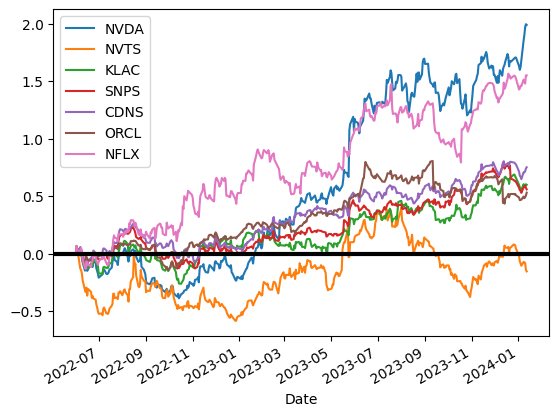

In [10]:
pf.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)

/Users/ma/miniconda3/lib/python3.11/site-packages/finquant/portfolio.py:773: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (stock_volatility[idx], stock_returns[idx]),


                      NVDA      NVTS      KLAC      SNPS      CDNS      ORCL  \
Min Volatility    0.003511  0.011096  0.103223  0.216911  0.229292  0.317706   
Max Sharpe Ratio  0.313794  0.007899  0.011113  0.001607  0.054019  0.288780   

                      NFLX  
Min Volatility    0.118261  
Max Sharpe Ratio  0.322788  
                  Expected Return  Volatility  Sharpe Ratio
Min Volatility           0.384093    0.267691      1.416157
Max Sharpe Ratio         0.594532    0.335537      1.756982


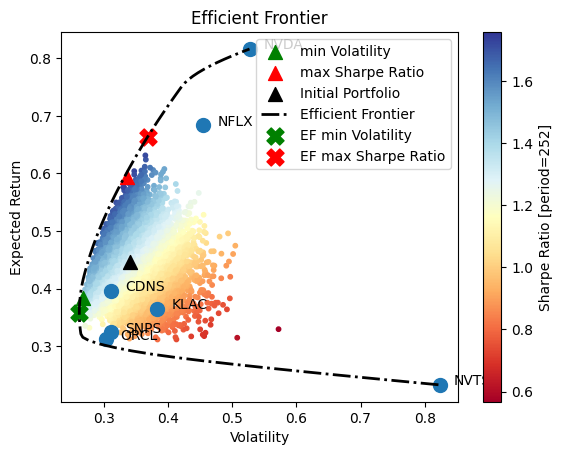

In [11]:
# performs and plots results of Monte Carlo run (5000 iterations)
opt_w, opt_res = pf.mc_optimisation(num_trials=10000)
# plots the results of the Monte Carlo optimisation
pf.mc_plot_results()
# plots the Efficient Frontier
pf.ef_plot_efrontier()
# plots optimal portfolios based on Efficient Frontier
pf.ef.plot_optimal_portfolios()
# plots individual plots of the portfolio
pf.plot_stocks()
print (opt_w)
print (opt_res)

<function ema at 0x13759bf60>


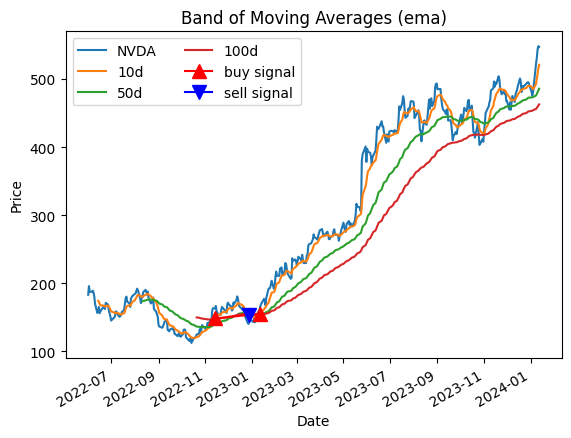

In [12]:
dis = pf.get_stock("NVDA").data.copy(deep=True)
spans = [10, 50, 100]
ma = compute_ma(dis, ema, spans, plot=True)
print (ema)

<function ema at 0x13759bf60>


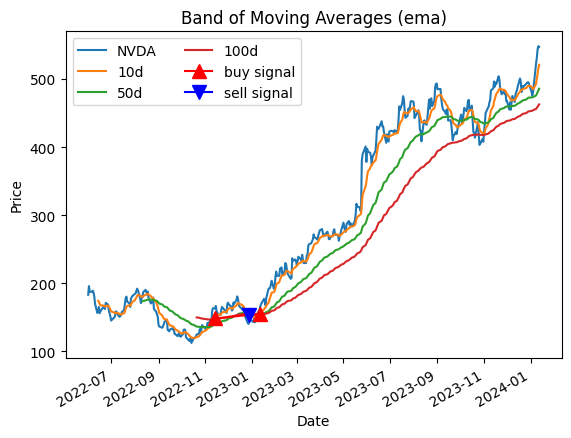

In [13]:
dis = pf.get_stock("NVDA").data.copy(deep=True)
spans = [10, 50, 100]
ma = compute_ma(dis, ema, spans, plot=True)
print (ema)